# Deep Learning 101

This notebook presents the basic notions that involve the concept of Deep Learning.

1. **Linear Regression**
2. Logistic Regression
3. Artificial Neural Networks
4. Deep Neural Networks
5. Convolutional Neural Networks

## 1. Linear Regression

Linear regression is a simple machine learning algorithm. This solves a regression problem. 

* The goal is to build a system that can take a vector $\mathbf{x} \in \mathbb{R}^n$ as input and predict the value of a scalar $y \in \mathbb{R}$ as its output.
* The output is a linear function of the input.
* We define the output to be $\hat{y}=\mathbf{w}^{\top}\mathbf{x}+\mathbf{b}$
    * $\hat{y}$ is the value that our model predicts
    * $\mathbf{w}$ as a set of weights
    * $\mathbf{b}$ the bias parameter
    
In order **to find the best possible model to describe our data, we need to find a way to decide how good a model is.**


### Cost function

It's often preferable to use the cost function called **Mean Squared Error**.

$$MSE = \frac{1}{n} \sum_{i} (y_i - \hat{y}_i)^2$$
 
The MSE is preferable because it's smooth and is guaranteed to have a global minimum.

### Gradient Descent

Gradient descent is an optimization algorithm that refers to the task of either minimizing or maximizing some function $f (x)$ by altering $x$.

When we are minimizing it, we may also call it the **cost function, loss function**, or **error function**.

We can thus reduce $f(x)$ by moving $x$ in **small steps** with opposite sign of the derivative.

$$\nabla f =
    \begin{bmatrix}
        \frac{\partial f}{\partial x_1} \\
        \frac{\partial f}{\partial x_2}
    \end{bmatrix}
$$


### Learning Rate

Positive scalar determining the size of the step.

$$x'=x-\epsilon\nabla_x f(x)$$
* $\epsilon$ this is called **learning rate**

----


## Linear Regression with Keras and TensorFlow


| **Keras**      | **Example**                                                         | **Link**                 |
| -------------- |:------------------------------------------------------------------: | :-----------------------:|
| **Loss functions**| binary-cross-entropy, categorical-cross-entropy, mean-squared-error | [keras.io/losses/](https://keras.io/losses/)|
| **Optimizers** | SGD, Adam, RMSprop, AdaGrad, AdaDelta | [keras.io/optimizers/](https://keras.io/optimizers/)|

![optimizers gif](img/optimizers.gif)

---

## 1. Load data

#### Load libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
np.random.seed(12049)

#### Getting the data

In [3]:
# read csv function, dataset
df = pd.read_csv('data/weight-height.csv')
# head method shows the first five lines of data frame
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


#### Explore visual data

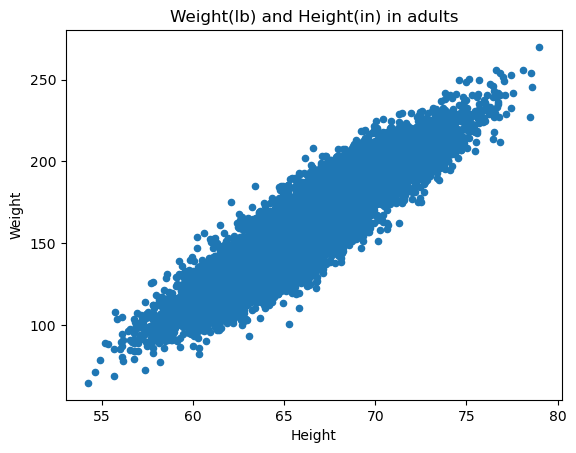

In [10]:
# scatter plot (not order, correlation)
plot = df.plot(kind='scatter',
        x='Height', y='Weight',
        title='Weight(lb) and Height(in) in adults')

In [7]:
# independent variable
X = df[['Height']].values

# dependent variable
y_true = df['Weight'].values

## 2. Define model

In [8]:
# building a linear stack of layers with the sequential model
model = tf.keras.Sequential()

# Add layer
model.add(tf.keras.layers.Dense(1, input_shape=(1,)))

#### Model visualization

In [9]:
# plot a Keras model
tf.keras.utils.plot_model(model, to_file='img/model01_lin_reg.png',
           show_shapes=True, show_layer_names=True)

# prints a summary representation of your model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


![Linear regression](img/model01_lin_reg.png)

## 3. Compile model

In [12]:
# compiling the sequential model
model.compile(tf.keras.optimizers.Adam(learning_rate=0.6), loss='mean_squared_error', metrics=['mse'])

## 4. Fit model

In [13]:
# training the model and saving metrics in history
history = model.fit(X, y_true, epochs=50, verbose=1)

Epoch 1/50
  1/313 [..............................] - ETA: 53s - loss: 48450.5391 - mse: 48450.5391

2023-10-12 16:14:37.601951: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


313/313 [==============================] - 0s 501us/step - loss: 1130.7733 - mse: 1130.7733
Epoch 2/50
313/313 [==============================] - 0s 459us/step - loss: 564.2110 - mse: 564.2110
Epoch 3/50
313/313 [==============================] - 0s 457us/step - loss: 536.7604 - mse: 536.7604
Epoch 4/50
313/313 [==============================] - 0s 460us/step - loss: 499.5184 - mse: 499.5184
Epoch 5/50
313/313 [==============================] - 0s 456us/step - loss: 474.5327 - mse: 474.5327
Epoch 6/50
313/313 [==============================] - 0s 457us/step - loss: 445.9250 - mse: 445.9250
Epoch 7/50
313/313 [==============================] - 0s 459us/step - loss: 398.9161 - mse: 398.9161
Epoch 8/50
313/313 [==============================] - 0s 455us/step - loss: 391.0186 - mse: 391.0186
Epoch 9/50
313/313 [==============================] - 0s 457us/step - loss: 339.4918 - mse: 339.4918
Epoch 10/50
313/313 [==============================] - 0s 456us/step - loss: 315.3807 - mse: 315.380

## 5. Evaluate model

In [14]:
history.history.keys()

dict_keys(['loss', 'mse'])

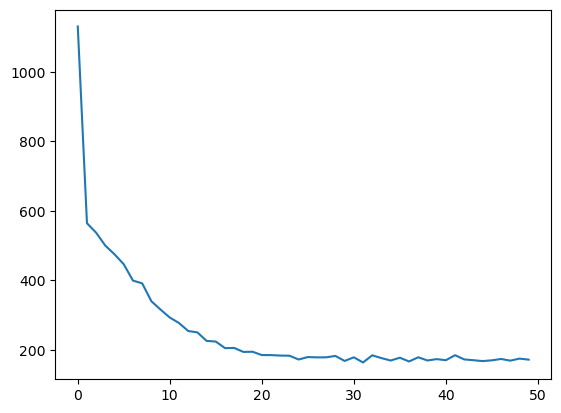

In [16]:
plt.plot(history.history['mse'])
plt.show()

In [17]:
# evaluate the model performance
score = model.evaluate(X, y_true) 

print('Test score:', score)

313/313 [==============================] - 0s 419us/step - loss: 236.2993 - mse: 236.2993
Test score: [236.29934692382812, 236.29934692382812]


313/313 [==============================] - 0s 438us/step


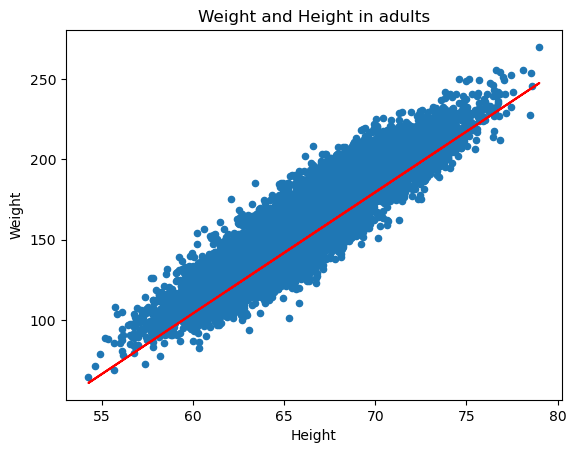

In [19]:
# generate predictions
y_pred = model.predict(X)

df.plot(kind='scatter', x='Height', y='Weight', 
        title='Weight and Height in adults')
plt.plot(X, y_pred, color='red')
plt.show()

## References

* [Deep Learning Book](http://www.deeplearningbook.org)

* [Zero to Deep Learning™ Udemy Video Course](https://github.com/dataweekends/zero_to_deep_learning_udemy)

* [weight-height.csv](https://www.kaggle.com/mustafaali96/weight-height)